# IS4487 Week 4 - Assignment

### Outline

Our Goals with this Project:

1. Import and review the data
2. Perform EDA and Clean Data

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Assignments/assignment_04_data_understanding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Business Case: AdviseInvest
You work on a small team of data analysts at AdviseInvest, a venture-backed startup. The Director of Sales at AdviseInvest has approached your team asking for help solving a staffing problem.

### The Company
The company's mission is to provide tools and support to help ordinary people gain control of their personal finances. The company leverages technology to provide affordable financial advice to a national client base.

Customers who reach AdviseInvest's website go through five steps:

- Open an account.
- Complete a customer profile form with basic information about their background and finances.
- Schedule a free phone conversation with a sales representative during a 1-hour window of time.
- Attend the free phone conversation.
- Buy a financial plan.
- There are three types of financial plans: Beginner, Intermediate, and Advanced. Each is sold at a different price, and there are varying degrees of personalization. After a customer purchases a financial plan, the customer is assigned a financial planner who helps determine the customer's goals and advises the customer on spending decisions.

### The Problem
Some customers are lost at each stage of the process. Steps 3 and 4 are particularly challenging because approximately 50% of those who schedule a phone conversation fail to pick up the call. This leads to inefficiencies from a staffing perspective.

AdviseInvest has 4 sales reps on staff during each particular 1-hour window. Each of the 4 reps is assigned 2 prospective customers per hour, which means that the company schedules a total of 8 phone calls per hour. The calls are outgoing: sales reps call customers who scheduled a phone conversation during that hour window.

Unfortunately, as noted above, many of the customers who scheduled a call do not answer. As a consequence, sales reps are often left underutilized. Moreover, they are underutilized unevenly. For example, it is possible that one sales rep will not do any sales calls during that hour, whereas another will be busy the entire hour with two calls. Sales reps have nothing to do when customers do not answer the scheduled phone call.

For this assignment, the variable `answered` is your target.  

### AdviseInvest Data Dictionary

| Variable | Description | Type | Code |
|:---|:---|:---|:---|
| Answered | Customer response | Binary | 0: customer did not answer scheduled call; 1: customer answered scheduled call |
| Income | Customer income in US dollars | Numeric | |
| Female | Customer gender | Binary | 0: female; 1: male |
| Age | Age in years | Numeric | |
| Job | Nature of job | Categorical | 0 : unemployed; 1 : entry level position; 2 : midlevel position; 3 : management/ self-employed/ highly qualified employee/ officer |
| Num_dependents | Number of people for whom the customer provides maintenance | Numeric | |
| Rent | Customer rents | Binary | 0: no; 1: yes |
| Own_res | Customer owns residence | Binary | 0: no; 1: yes |
| New_car | Recent new car purchase | Binary | New car purchase in the last 3 months: 0: no, 1: yes |
| Chk_acct | Checking account status | Categorical | 0 : no checking account; 1: checking < 200 USD; 2 : 200 < checking < 2000 USD; 3: 2000 < checking < 35000 USD; 4: >= 3500 USD |
| Sav_acct | Average balance in savings account | Categorical | 0 : no savings account; 1 : 100 <= savings < 500 USD; 2 : 500 <= savings < 2000 USD; 3 : 2000 < savings < 35000 USD; 4: >= 3500 USD |
| Num_accts | Number of accounts owned by customer | Numeric | |
| Mobile | Mobile phone | Binary | 0: customer provided non‐mobile phone for follow‐up call; 1: customer provided mobile phone for follow‐up call |
| Product | Type of product purchased after conversation with sales rep | Categorical | 0: customer did not answer call; 1: customer answered but did not purchase a product; 2: customer answered and purchased Beginner plan; 3: customer answered and purchased Intermediate plan; 4: customer answered and purchased Advanced plan |


### Load Libraries

Import the libraries you will need, such as:
- Pandas
- Sklearn
- Matplotlib


In [15]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

## Step 1: Initial Data Understanding

### Do the following:
 - Import data from the AdviseInvest historical dataset into a dataframe (in GitHub go to Assignments > DataSets)
 - Describe or profile the dataframe
 - Think about if there are any outliers, missing values, or duplicates.  We will cover those topics next week.  

In [17]:
#Import the data

df = pd.read_csv('https://raw.githubusercontent.com/Stan-Pugsley/is_4487_base/main/DataSets/adviseinvest_historical_data.csv')
display(df.head())

,answered,income,female,age,job,num_dependents,rent,own_res,new_car,chk_acct,sav_acct,num_accts,mobile,product
0,1,13520,0,23,0,1,1,0,0.0,0,2,0,1,2
1,0,14780,0,22,2,1,0,1,0.0,3,0,3,0,0
2,1,37570,0,62,2,1,0,0,1.0,3,0,4,0,4
3,0,12450,0,33,2,1,0,1,0.0,1,0,2,0,0
4,0,12400,0,48,1,2,0,0,1.0,2,1,4,0,0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29504 entries, 0 to 29503
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   answered        29504 non-null  int64  
 1   income          29504 non-null  int64  
 2   female          29504 non-null  object 
 3   age             29504 non-null  int64  
 4   job             29504 non-null  int64  
 5   num_dependents  29504 non-null  int64  
 6   rent            29504 non-null  int64  
 7   own_res         29504 non-null  int64  
 8   new_car         29502 non-null  float64
 9   chk_acct        29504 non-null  int64  
 10  sav_acct        29504 non-null  int64  
 11  num_accts       29504 non-null  int64  
 12  mobile          29504 non-null  int64  
 13  product         29504 non-null  int64  
dtypes: float64(1), int64(12), object(1)
memory usage: 3.2+ MB


In [19]:
df.describe(include='all')

,answered,income,female,age,job,num_dependents,rent,own_res,new_car,chk_acct,sav_acct,num_accts,mobile,product
count,29504.000000,29504.000000,29504,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29502.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000
unique,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,27903,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.546638,33766.893303,NaN,34.773454,1.915401,1.140998,0.210412,0.681128,0.240797,1.468547,0.956616,2.458345,0.091106,1.535792
std,0.497829,29379.202710,NaN,11.369865,0.658183,0.348025,0.407608,0.466047,0.427575,1.234727,1.483946,19.497380,0.287765,1.625916
min,0.000000,-65600.000000,NaN,19.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,13550.000000,NaN,26.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
50%,1.000000,23310.000000,NaN,32.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,1.000000
75%,1.000000,41690.000000,NaN,40.000000,2.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,3.000000


# Step 2: Begin to Explore the Data

We will learn more about Exploratory Data Analysis (EDA) in Week 5. The following steps are to help you connect the data visualization steps that we practiced last week with the process of data understanding - learning more about the dataset and finding the data quality issues that need to be addressed.   These are the first steps in EDA.

### Do the following:
- Explore the relationships between the target and independent variables
- Create at least five charts to show the relationships, using different chart types that are approriate to the analysis
- Ensure that all charts are clearly labeled and formatted

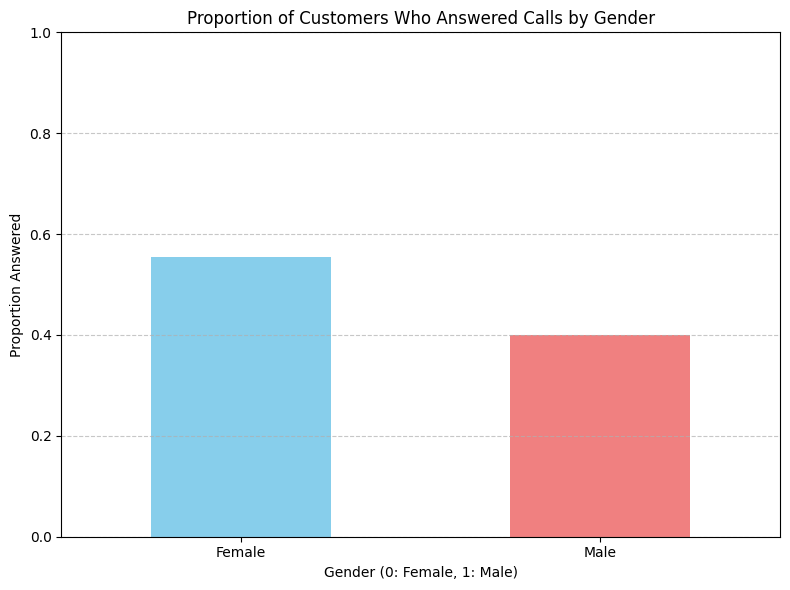

answered,proportion_answered
female_numeric,
Female,0.555066
Male,0.400000


In [24]:
# Chart 1: Proportion of customers who answered calls based on gender

# Convert 'female' column to numeric, coercing errors to NaN
# This will turn 'M' into NaN, allowing us to filter it out or handle it.
df['female_numeric'] = pd.to_numeric(df['female'], errors='coerce')

# Filter out rows where 'female_numeric' is NaN (which were originally 'M')
# Use .copy() to ensure we are working on a distinct DataFrame and avoid SettingWithCopyWarning
df_cleaned_gender = df.dropna(subset=['female_numeric']).copy()

# Convert 'female_numeric' to integer type
df_cleaned_gender['female_numeric'] = df_cleaned_gender['female_numeric'].astype(int)

# Group by 'female_numeric' and 'answered' to count occurrences
gender_answered_counts = df_cleaned_gender.groupby(['female_numeric', 'answered']).size().unstack(fill_value=0)

# Calculate the total for each gender
gender_answered_counts['total'] = gender_answered_counts.sum(axis=1)

# Calculate the proportion of answered calls for each gender
gender_answered_counts['proportion_answered'] = gender_answered_counts[1] / gender_answered_counts['total']

# Rename the index for clarity
gender_answered_counts = gender_answered_counts.rename(index={0: 'Female', 1: 'Male'}) # Assuming 0: Female, 1: Male as per data dictionary

# Plotting the bar chart
plt.figure(figsize=(8, 6))
gender_answered_counts['proportion_answered'].plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Proportion of Customers Who Answered Calls by Gender')
plt.xlabel('Gender (0: Female, 1: Male)')
plt.ylabel('Proportion Answered')
plt.xticks(rotation=0)
plt.ylim(0, 1) # Set y-axis limit from 0 to 1 for proportions
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Display the calculated proportions
display(gender_answered_counts[['proportion_answered']])

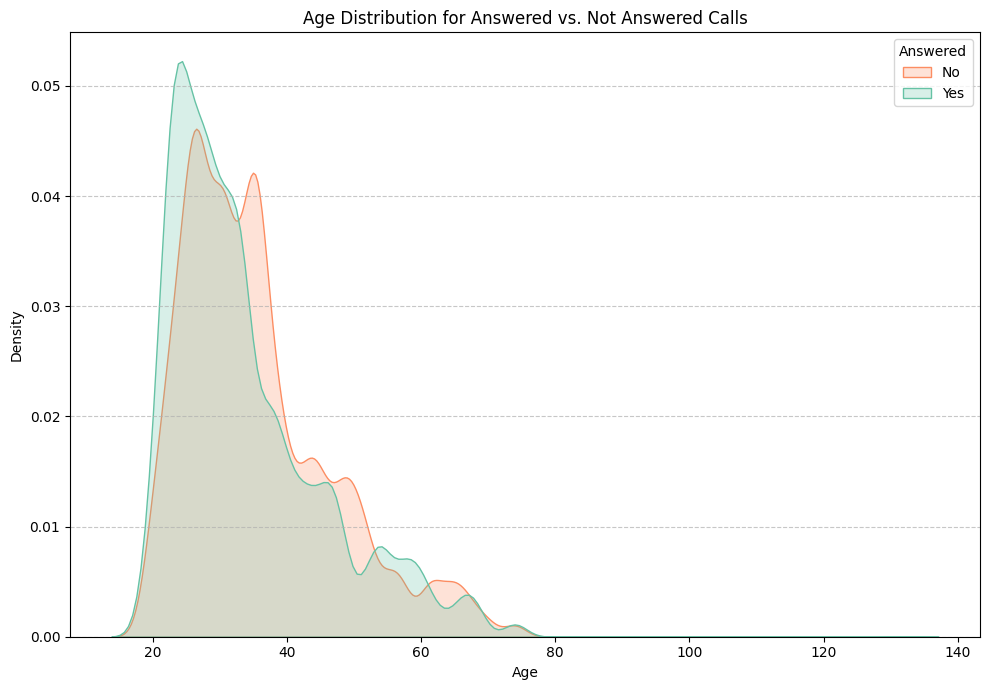

In [33]:
# Chart 2: Age distribution for answered vs. not answered calls (KDE Plot)

plt.figure(figsize=(10, 7))
sns.kdeplot(data=df, x='age', hue='answered', fill=True, common_norm=False, palette='Set2')
plt.title('Age Distribution for Answered vs. Not Answered Calls')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend(title='Answered', labels=['No', 'Yes'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

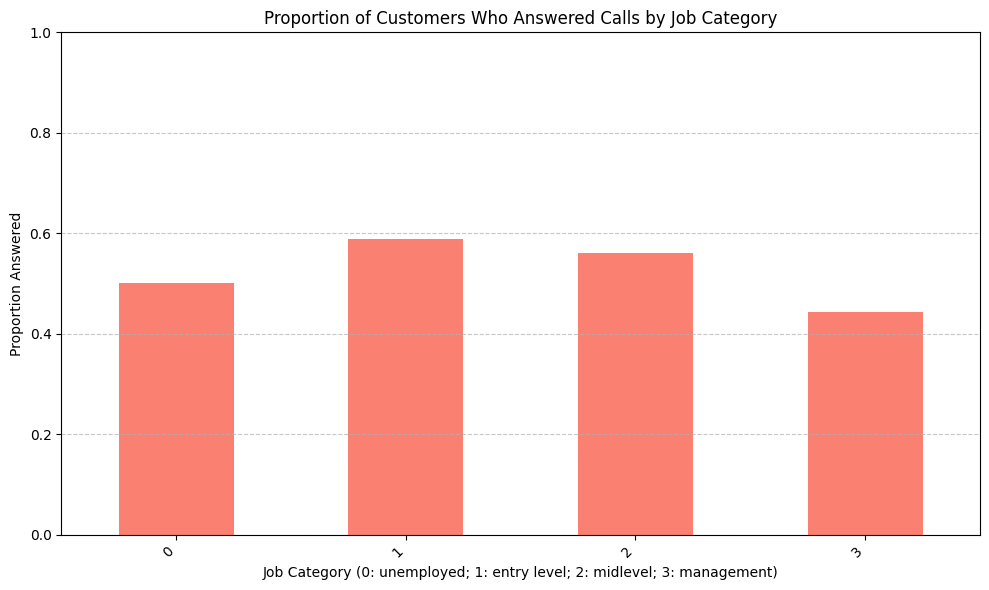

,proportion_answered
job,
0,0.500000
1,0.588235
2,0.561224
3,0.442857


In [38]:
# Chart 3: Proportion of customers who answered calls by Job Category (Vertical Bar Chart)

# Define new labels based on the data dictionary
job_labels = {
    0: 'Unemployed',
    1: 'Entry Level',
    2: 'Midlevel',
    3: 'Management/Self-employed'
}

# Group by 'job' and 'answered' to count occurrences
job_answered_counts = df.groupby(['job', 'answered']).size().unstack(fill_value=0)

# Rename columns for clarity
job_answered_counts.columns = ['not_answered', 'answered']

# Calculate the total for each job category
job_answered_counts['total'] = job_answered_counts['not_answered'] + job_answered_counts['answered']

# Calculate the proportion of answered calls for each job category
job_answered_counts['proportion_answered'] = job_answered_counts['answered'] / job_answered_counts['total']

# Plotting the vertical bar chart
plt.figure(figsize=(12, 7)) # Increased figure size for better label spacing
sns.barplot(x=job_answered_counts.index, y='proportion_answered', data=job_answered_counts.reset_index(), palette='viridis')
plt.title('Proportion of Customers Who Answered Calls by Job Category')
plt.xlabel('Job Category')
plt.ylabel('Proportion Answered')

# Apply descriptive labels to the x-axis
plt.xticks(ticks=job_answered_counts.index, labels=[job_labels[i] for i in job_answered_counts.index], rotation=45, ha='right') # Rotate and align for readability

plt.ylim(0, 1) # Set y-axis limit from 0 to 1 for proportions
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Display the calculated proportions
display(job_answered_counts[['proportion_answered']])

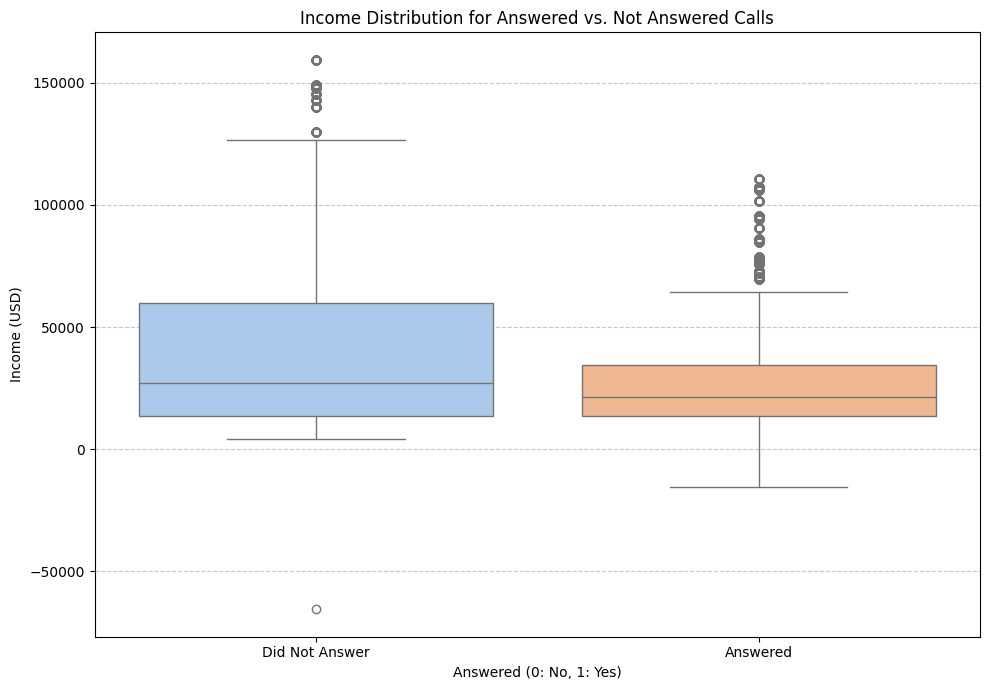

In [41]:
# Chart 4: Income Distribution for Answered vs. Not Answered Calls (Box Plot)

plt.figure(figsize=(10, 7))
sns.boxplot(data=df, x='answered', y='income', hue='answered', palette='pastel', legend=False)
plt.title('Income Distribution for Answered vs. Not Answered Calls')
plt.xlabel('Answered (0: No, 1: Yes)')
plt.ylabel('Income (USD)')
plt.xticks([0, 1], ['Did Not Answer', 'Answered'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

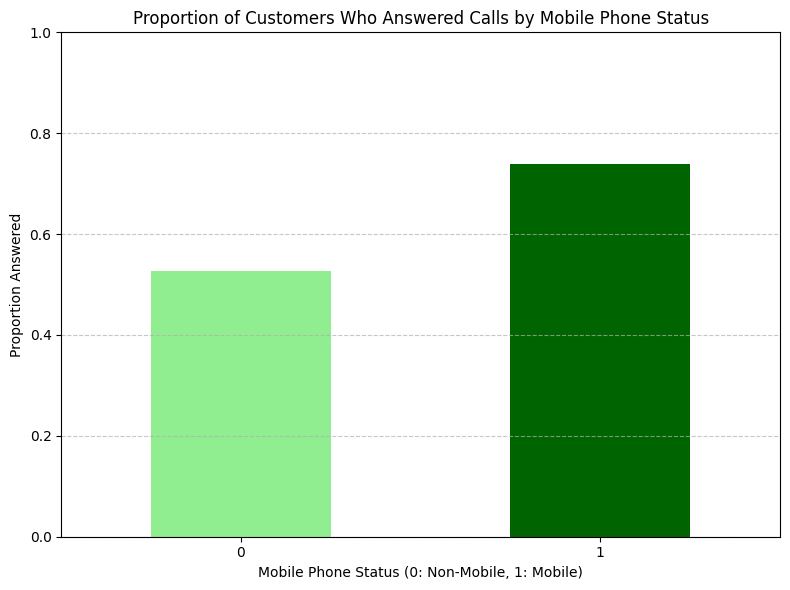

,proportion_answered
mobile,
0,0.527446
1,0.738095


In [40]:
# Chart 5: Proportion of customers who answered calls by Mobile Phone Status

# Group by 'mobile' and 'answered' to count occurrences
mobile_answered_counts = df.groupby(['mobile', 'answered']).size().unstack(fill_value=0)

# Rename columns for clarity
mobile_answered_counts.columns = ['not_answered', 'answered']

# Calculate the total for each mobile status
mobile_answered_counts['total'] = mobile_answered_counts['not_answered'] + mobile_answered_counts['answered']

# Calculate the proportion of answered calls for each mobile status
mobile_answered_counts['proportion_answered'] = mobile_answered_counts['answered'] / mobile_answered_counts['total']

# Plotting the bar chart
plt.figure(figsize=(8, 6))
mobile_answered_counts['proportion_answered'].plot(kind='bar', color=['lightgreen', 'darkgreen'])
plt.title('Proportion of Customers Who Answered Calls by Mobile Phone Status')
plt.xlabel('Mobile Phone Status (0: Non-Mobile, 1: Mobile)')
plt.ylabel('Proportion Answered')
plt.xticks(rotation=0)
plt.ylim(0, 1) # Set y-axis limit from 0 to 1 for proportions
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Display the calculated proportions
display(mobile_answered_counts[['proportion_answered']])

# Step 3: Summarize Your Findings
Question 3.1: Are all of the variables useful and applicable to the business need?  (you should reference the target variable and whether other variables have are likely to be correlated with the target)

### ✍️ Your Response: 🔧
3.1. The business needs indicate the target variable is whether a customer answeres their scheduled call. Some variables seem to be more useful and applicable compared to others/ more correlated with the outcome of the target. The variables with higher correlation are Mobile Phone, Gender, Job Category, and income. Customers who provided a mobile phone number were more likely to answer their calls. Female customers were more likely to answer calls in compared to male customers. People in entry level and mid level roles were more likely to respond than unemployed or higher positions. Although with some overlap the income chart indicates that those with higher income were less likely to answer calls. On the other hand the overlap between those who answered or didnt answer their calls and their ages was heavy which might indicate that it is not a good predictor/ isnt highly correlated with the target.

Question 3.2: In what ways could the dataset be improved?  Are there any data quality issues or data types that should be fixed?

### ✍️ Your Response: 🔧
3.2. Income seems to have a large standard devidation in comparison to its mean. The maximum age of 132 seems to be an error. There are negative income values. although some variables should be binary they are floats like new car. Overall the data can use some cleaning of errors or misleading entries/ types.

## Submission Instructions

✅ **Before submitting:**
- Make sure all code cells are run and outputs are visible  
- All markdown questions are answered thoughtfully  
- Submit the assignment as an **HTML file** on Canvas

In [ ]:
!jupyter nbconvert --to html "assignment_04_data_understanding.ipynb"